x


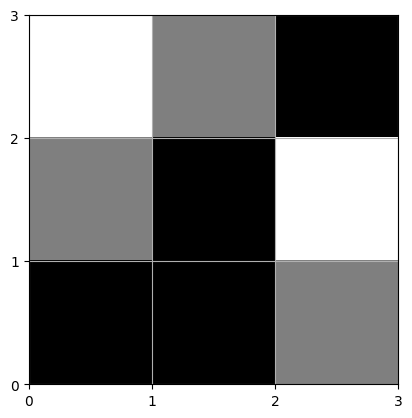

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# 1 -> O
# 2 -> X

def initial_state():
    #return([[None,None,None],[None,None,None],[None,None,None]])
    return([[0,0,0],[0,0,0],[0,0,0]])

def example_state():
    return([[0,1,2],[1,2,0],[2,1,1]])

def hard_example():
    return([[0,0,0],[0,2,0],[0,0,0]])

def display(map):
    temp=example_state()
    for i,j in enumerate(map):
        for u, n in enumerate(j):
            if n == None:
                temp[i][u]=-1
    #print(temp)
    plt.imshow(temp, cmap='binary', extent=[0, 3, 0, 3])  
    plt.xticks([0, 1, 2, 3])  
    plt.yticks([0, 1, 2, 3])  
    plt.grid(True)
    plt.show()

def player(board):
    board = np.array(board) 

    unique, counts = np.unique(board, return_counts=True)

    print(dict(zip(unique, counts))) 

    if counts[0] is None and counts[2] is None and counts[1] is None:
        pass
    if counts[1] and counts[2]:
        if counts[1] > counts[2]:
            return "x"
        return "o"
    
    

def main():
    new = initial_state()
    hard = hard_example()

    new_2 = example_state()
    print(player(hard))

    display(new)

main()




In [4]:
import matplotlib.pyplot as plt
import numpy as np 
# def initial_state(x):
#     if x == "s_0":
#         return [0,0,0,0,0,0,0,0,0]
        

def initial_state():
    return [0,0,0,0,"x",0,0,0,0]

def game_state():
    return ["o",0,"x","o","x",0,"x","o","x"]

def game_draw_state():
    return ["o",0,0,"o","x",0,"x","o","x"]


def game_draw_state():
    return ["o",0,0,"o","x",0,"x","o","x"]

def game_state_o():
    return ["x","o","o","o","x","o","x","x","o"]

def game_state_x():
    return ["x","o","o","o","x","o","0","x","x"]


def print_tic_tac_toe(values):

    print("\n")
    print("\t     |     |")
    print("\t  {}  |  {}  |  {}".format(values[0], values[1], values[2]))
    print('\t_____|_____|_____')
 
    print("\t     |     |")
    print("\t  {}  |  {}  |  {}".format(values[3], values[4], values[5]))
    print('\t_____|_____|_____')
 
    print("\t     |     |")
 
    print("\t  {}  |  {}  |  {}".format(values[6], values[7], values[8]))
    print("\t     |     |")
    print("\n")


# print_tic_tac_toe(initial_state())
print_tic_tac_toe(game_state_x())



	     |     |
	  x  |  o  |  o
	_____|_____|_____
	     |     |
	  o  |  x  |  o
	_____|_____|_____
	     |     |
	  0  |  x  |  x
	     |     |




In [4]:
def player_turn(board):
    
    x_value = board.count("x")
    o_value = board.count("o")

    if x_value and o_value is None or x_value == o_value:
        return "x"
    elif x_value > o_value:
        return "o"
    else:
        return "x"
    
player_turn(initial_state())

'o'

In [7]:
def actions(board):
    temp_arr = np.asarray(board)
    newarr  = temp_arr.reshape(3,3)
    indices = np.argwhere(newarr == '0')
    print(newarr)
    return print(indices)
    # list_actions = []
    # for i,value in enumerate(board):
    #     if value == 0:
    #         list_actions.append(i)
    # return print(list_actions)
    

actions(game_draw_state())

[['0' 'x' 'o']
 ['o' 'x' 'x']
 ['x' '0' 'o']]
[[0 0]
 [2 1]]


In [5]:

def checkRows(board):
    for row in board:
        if len(set(row)) == 1:
            return row[0]
    return 0

def checkDiagonals(board):
    if len(set([board[i][i] for i in range(len(board))])) == 1:
        return board[0][0]
    if len(set([board[i][len(board)-i-1] for i in range(len(board))])) == 1:
        return board[0][len(board)-1]
    return 0

def checkWin(board):
    temp_arr = np.asarray(board)
    board  = temp_arr.reshape(3,3)
    #transposition to check rows, then columns
    for newBoard in [board, np.transpose(board)]:
        result = checkRows(newBoard)
        if result:
            return result
    return checkDiagonals(board)

# temp_arr = np.asarray(game_state_1())
# board  = temp_arr.reshape(3,3)

print(checkWin(game_state_x()))

x


In [6]:
#If the game is over retrieve Ture or False
def terminals(board):   
    for i,value in enumerate(board):
        if value == 0:
            board.remove(value)
    if len(board) == 9 or checkWin(board) == "x" or checkWin(board) == "o":
        return print(True)
    return print(False)

terminals(game_state_x())

True


In [27]:

def results(board, action, play_turn):
    #(1,2)
    temp_arr = np.asarray(board)
    board  = temp_arr.reshape(3,3)
    
    board[action] = play_turn
    
    return print(board) 

results(game_state(),(0,0),player_turn(game_state()))
    

[['o' '0' 'x']
 ['o' 'x' '0']
 ['x' 'o' 'x']]


In [28]:
def utilitys(board):
    # temp_arr = np.asarray(board)
    # board  = temp_arr.reshape(3,3)

    if checkWin(board) == "o":
        return -1
    elif checkWin(board) == "x":
        return 1
    elif checkWin(board) == 0:
        return 0


print(utilitys(game_state()))

1


In [29]:
player, opponent = 'x', 'o'

def evaluate(b) : 
	
	# Checking for Rows for X or O. 
	for row in range(3) :	 
		if (b[row][0] == b[row][1] and b[row][1] == b[row][2]) :		 
			if (b[row][0] == player) : 
				return 10
			elif (b[row][0] == opponent) : 
				return -10

	# Checking for Columns for X or O.
	for col in range(3) : 
	
		if (b[0][col] == b[1][col] and b[1][col] == b[2][col]) : 
		
			if (b[0][col] == player) : 
				return 10
			elif (b[0][col] == opponent) : 
				return -10

	# Checking for Diagonals for X or O.
	if (b[0][0] == b[1][1] and b[1][1] == b[2][2]) : 
	
		if (b[0][0] == player) : 
			return 10
		elif (b[0][0] == opponent) : 
			return -10

	if (b[0][2] == b[1][1] and b[1][1] == b[2][0]) : 
	
		if (b[0][2] == player) : 
			return 10
		elif (b[0][2] == opponent) : 
			return -10

	# Else if none of them have won then return 0 
	return 0


In [30]:
def minimax(board, depth, isMax):
    score = evaluate(board)

    if (score == 10):
        return score
    
    if score == -10 :
        return score
    
    if terminals(board) == False:
        return 0
    
    if (isMax):
        best = -1000
        for i in range(3):
            for j in range(3):
                # Check if cell is empt
                if board[i][j] == 0:
                    # Make the move 
                    board[i][j] = player

                    best = max (best, minimax(board, depth + 1,not isMax))
                    # undo the move
                    board[i][j] = 0
                    max_Eval = max([max_Eval,best])
        return best
    else: 
        best = 1000
        for i in range(3):
            for j in range(3):
                if board[i][j] == 0:
                    # Make the move 
                    board[i][j] = player
                    best = max (best, minimax(board, depth + 1 ,not isMax))
                    # undo the move
                    board[i][j] = 0
                    # evaluate the Min Evaluate 
                    min_Eval = min([min_Eval,best])
        return best
    
